In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 

from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

In [2]:
user_seg_df=pd.read_csv('KMEANS-PCA Data.csv')

In [3]:
user_seg_df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
user_seg_df.drop('ID',axis=1, inplace=True)

<Axes: xlabel='Sex', ylabel='count'>

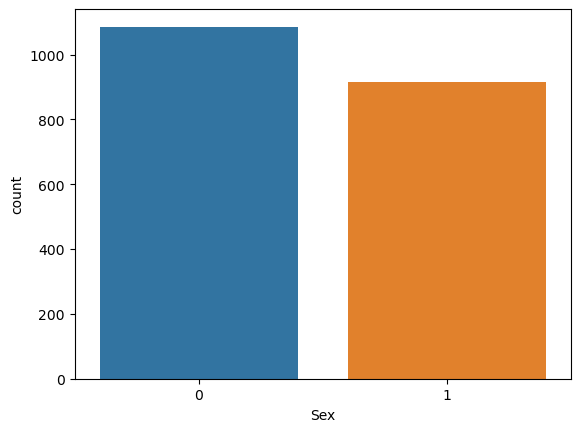

In [5]:
sns.countplot(x='Sex',data=user_seg_df)

<Axes: xlabel='Occupation', ylabel='count'>

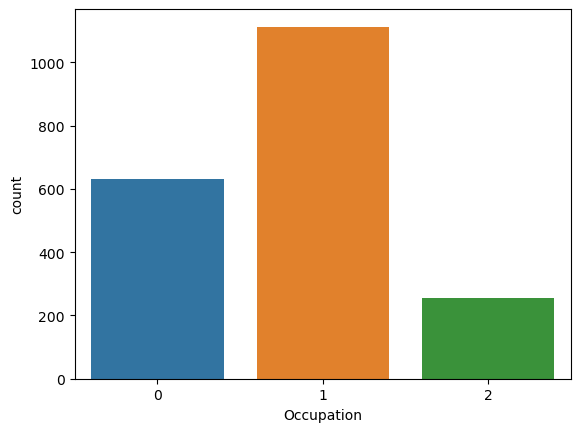

In [6]:
sns.countplot(x='Occupation',data=user_seg_df)

In [7]:
std_scaler = StandardScaler() 
user_seg_df_std = std_scaler.fit_transform(user_seg_df) 

In [8]:
hier_cluster = linkage(user_seg_df_std, method = 'ward')

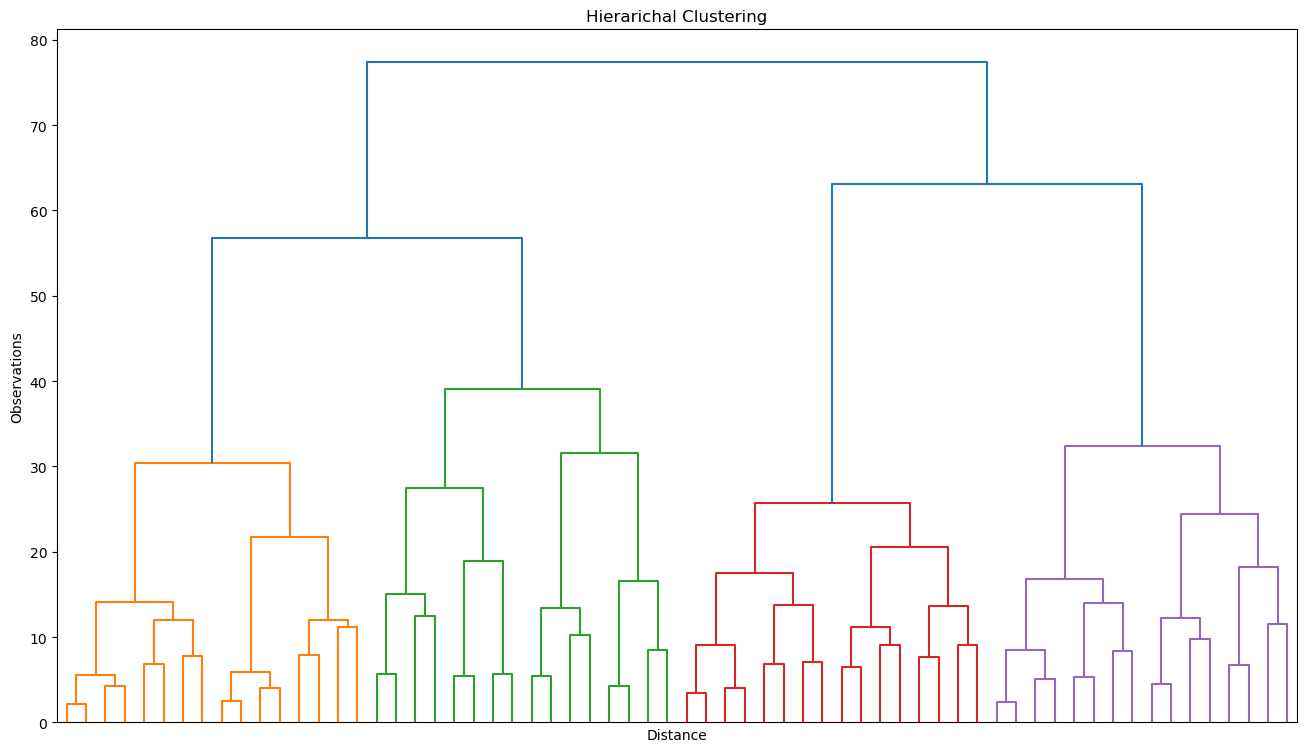

In [9]:
plt.figure(figsize=(16,9))
plt.ylabel('Observations')
plt.xlabel('Distance')
plt.title('Hierarichal Clustering')
dendrogram(hier_cluster,
          truncate_mode='level',
          p=5,
          show_leaf_counts=False,
          no_labels=True)
plt.show()

## K-MEANS 

In [10]:
err_rate=[]
for i in range(1,11):
    kmeans_df = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans_df.fit(user_seg_df_std)
    err_rate.append(kmeans_df.inertia_)

C:\Users\MUH0351\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MUH0351\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MUH0351\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MUH0351\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

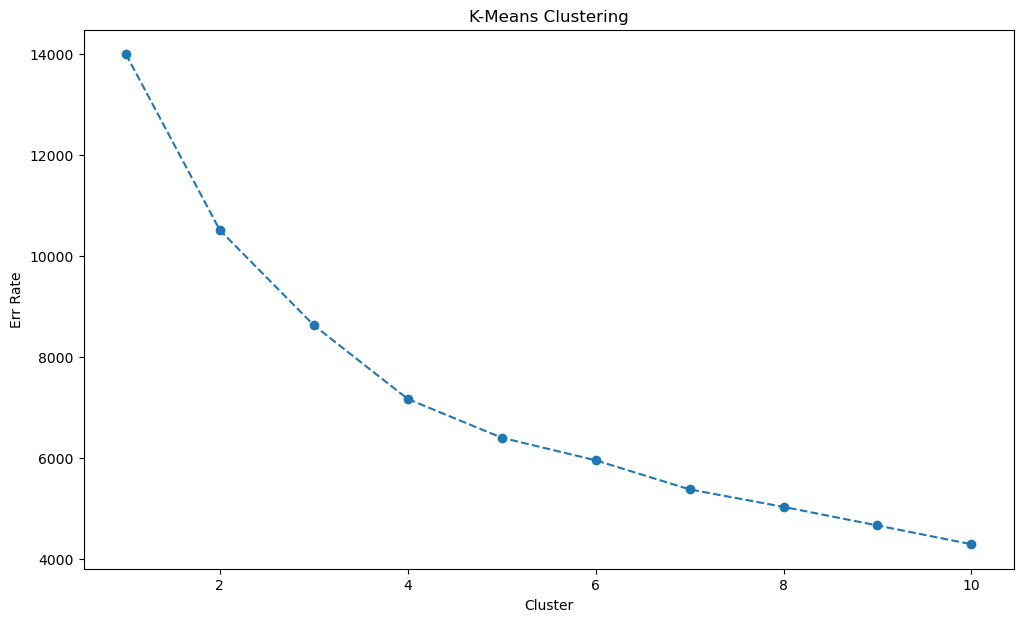

In [11]:
plt.figure(figsize=(12,7))
plt.plot(range(1,11),err_rate, marker='o', linestyle='--')
plt.xlabel('Cluster')
plt.ylabel('Err Rate')
plt.title('K-Means Clustering')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=101)
kmeans.fit(user_seg_df_std)

C:\Users\MUH0351\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=101)

# Evaluation of Model

In [13]:
user_seg_df_copy = user_seg_df.copy()
user_seg_df['K-Means Segments'] = kmeans.labels_

In [14]:
user_seg_df_mean = user_seg_df.groupby('K-Means Segments').mean()

In [15]:
user_seg_df_mean['Number of Obs'] = user_seg_df[['K-Means Segments','Sex']].groupby('K-Means Segments').count()
user_seg_df_mean

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Number of Obs
K-Means Segments,,,,,,,,
0,0.351410,0.019523,35.542299,0.744035,97802.724512,0.329718,0.043384,461
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705
2,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,264
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570


In [16]:
user_seg_df_mean['Ratio Of Obs'] = 100*(user_seg_df_mean['Number of Obs']/user_seg_df_mean['Number of Obs'].sum())
user_seg_df_mean

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Number of Obs,Ratio Of Obs
K-Means Segments,,,,,,,,,
0,0.351410,0.019523,35.542299,0.744035,97802.724512,0.329718,0.043384,461,23.05
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,35.25
2,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,264,13.20
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,28.50


In [17]:
user_seg_df_mean.rename({0:'Standard',
                         1:'Developed',
                         2:'Developing',
                         3:'Under-Developed'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Number of Obs,Ratio Of Obs
K-Means Segments,,,,,,,,,
Standard,0.351410,0.019523,35.542299,0.744035,97802.724512,0.329718,0.043384,461,23.05
Developed,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,35.25
Developing,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,264,13.20
Under-Developed,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,28.50


In [18]:
user_seg_df['Labels'] = user_seg_df['K-Means Segments'].map({0:'Standard',
                         1:'Developed',
                         2:'Developing',
                         3:'Under-Developed'})

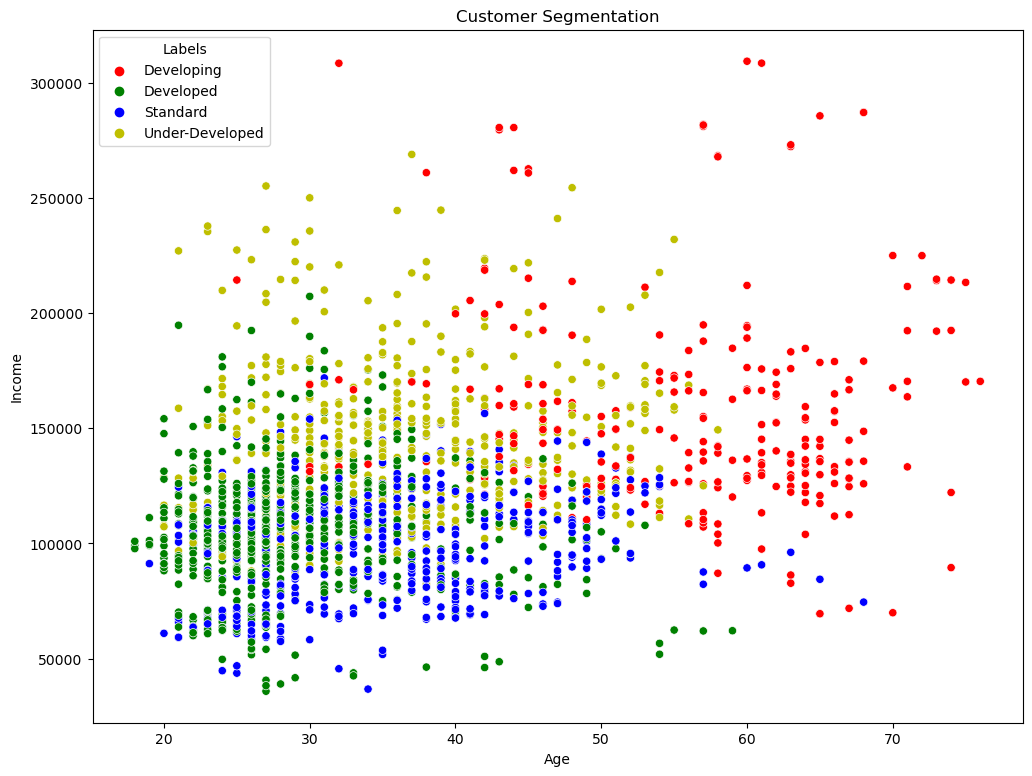

In [21]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='Age',y='Income', hue= 'Labels', palette=['r','g','b','y'], data=user_seg_df)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segmentation')
plt.show()

# PCA

In [22]:
pca = PCA()

In [23]:
user_seg_pca_trans = pca.fit(user_seg_df_std)

In [24]:
user_seg_pca_trans.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

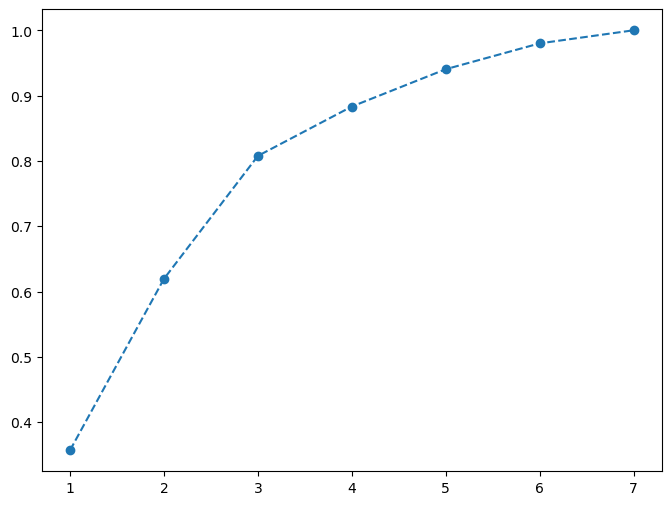

In [25]:
ylabel = user_seg_pca_trans.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8,6))
plt.plot(range(1,8),ylabel, linestyle='--', marker='o')
plt.show()

In [26]:
pca= PCA(n_components=3)

In [27]:
user_seg_pca_trans=pca.fit(user_seg_df_std)

In [28]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [29]:
df_pca_comp = pd.DataFrame(data=pca.components_,columns=user_seg_df_copy.columns.values, index=['Component 1','Component 2','Component3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x24b7cf0e940>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

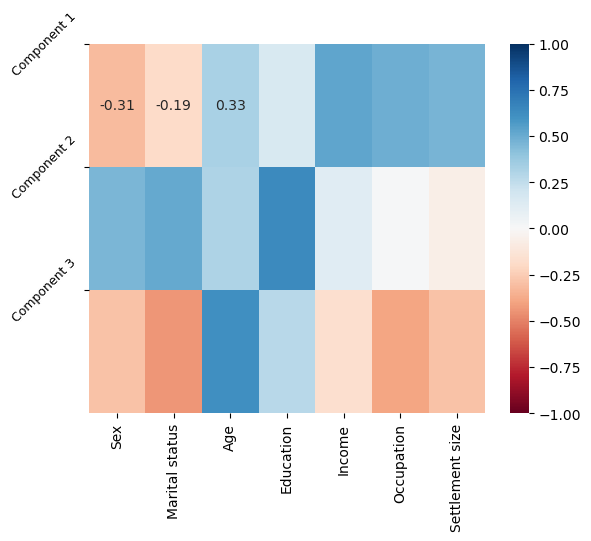

In [30]:
sns.heatmap(df_pca_comp,
           vmin=-1,
           vmax=1,
           annot=True,
           cmap='RdBu')
plt.yticks([0,1,2],
      ['Component 1','Component 2','Component 3'],
          rotation=45,
          fontsize=9)

In [31]:
pca_scores = pca.transform(user_seg_df_std)

In [32]:
err_rate=[]
for i in range(1,11):
    kmeans_df_pca = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans_df_pca.fit(pca_scores)
    err_rate.append(kmeans_df_pca.inertia_)

C:\Users\MUH0351\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MUH0351\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MUH0351\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MUH0351\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

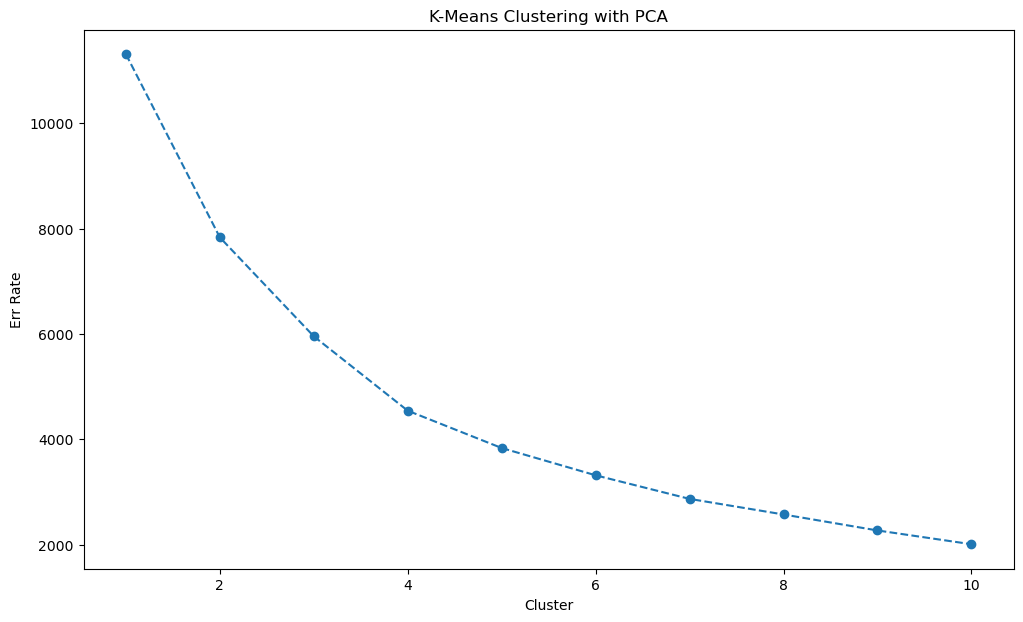

In [33]:
plt.figure(figsize=(12,7))
plt.plot(range(1,11),err_rate, marker='o', linestyle='--')
plt.xlabel('Cluster')
plt.ylabel('Err Rate')
plt.title('K-Means Clustering with PCA')
plt.show()

In [34]:
kmeans_df_pca = KMeans(n_clusters=4, init='k-means++', random_state=101)

In [35]:
kmeans_df_pca.fit(pca_scores)

C:\Users\MUH0351\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=101)

In [36]:
df_seg_kmeans_pca = pd.concat([user_seg_df_copy.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_seg_kmeans_pca.columns.values[-3:] = ['Component 1', 'Component 2','Component 3']
df_seg_kmeans_pca['K-Means Segments'] = kmeans_df_pca.labels_

In [37]:
df_seg_kmeans_pca_mean = df_seg_kmeans_pca.groupby(['K-Means Segments']).mean()
df_seg_kmeans_pca_mean

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
K-Means Segments,,,,,,,,,,
0,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
1,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039
2,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
3,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410


In [38]:
df_seg_kmeans_pca_freq = df_seg_kmeans_pca_mean.rename({0:'Standard',
                         1:'Developed',
                         2:'Developing',
                         3:'Under-Developed'})
df_seg_kmeans_pca_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
K-Means Segments,,,,,,,,,,
Standard,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
Developed,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039
Developing,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
Under-Developed,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410


In [39]:
df_seg_kmeans_pca['Legend']=df_seg_kmeans_pca['K-Means Segments'].map({0:'Standard',
                         1:'Developed',
                         2:'Developing',
                         3:'Under-Developed'})
df_seg_kmeans_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,K-Means Segments,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,1,Developed
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,3,Under-Developed
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0,Standard
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,2,Developing
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,2,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0,Standard
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,3,Under-Developed
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0,Standard
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,3,Under-Developed


Text(0.5, 1.0, 'Segmentation with PCA')

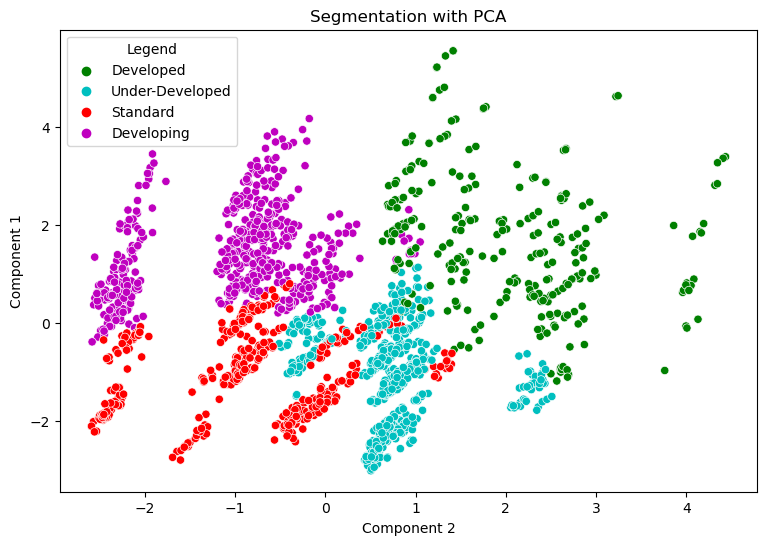

In [40]:
plt.figure(figsize=(9,6))
x_label = df_seg_kmeans_pca['Component 2']
y_label = df_seg_kmeans_pca['Component 1']
sns.scatterplot(data=df_seg_kmeans_pca, x=x_label, y=y_label, hue=df_seg_kmeans_pca['Legend'], palette=['g','c','r','m'])
plt.title('Segmentation with PCA')

In [41]:
pickle.dump(std_scaler, open('std_scaler.pickle','wb'))

In [42]:
pickle.dump(pca, open('pca.pickle','wb'))

In [43]:
pickle.dump(kmeans_df_pca, open('kmeans_df_pca.pickle','wb'))